In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *
import seaborn as sns

In [2]:
df = pd.read_excel('Concrete_Data.xls')

df.head()
df.describe()

df.columns

df.rename(columns = {'Cement (component 1)(kg in a m^3 mixture)' : 'cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' : 'blast',
       'Fly Ash (component 3)(kg in a m^3 mixture)' : 'fly',
       'Water  (component 4)(kg in a m^3 mixture)' : 'water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)' : 'super',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)' : 'coarse',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)' : 'fine', 'Age (day)' : 'age',
       'Concrete compressive strength(MPa, megapascals) ' : 'strength'}, inplace=True)

df.head()

X = df.drop(['strength'], axis=1)
X

Y = df['strength']
Y

scaler = MinMaxScaler()

X = scaler.fit_transform(X)
X.shape

(1030, 8)

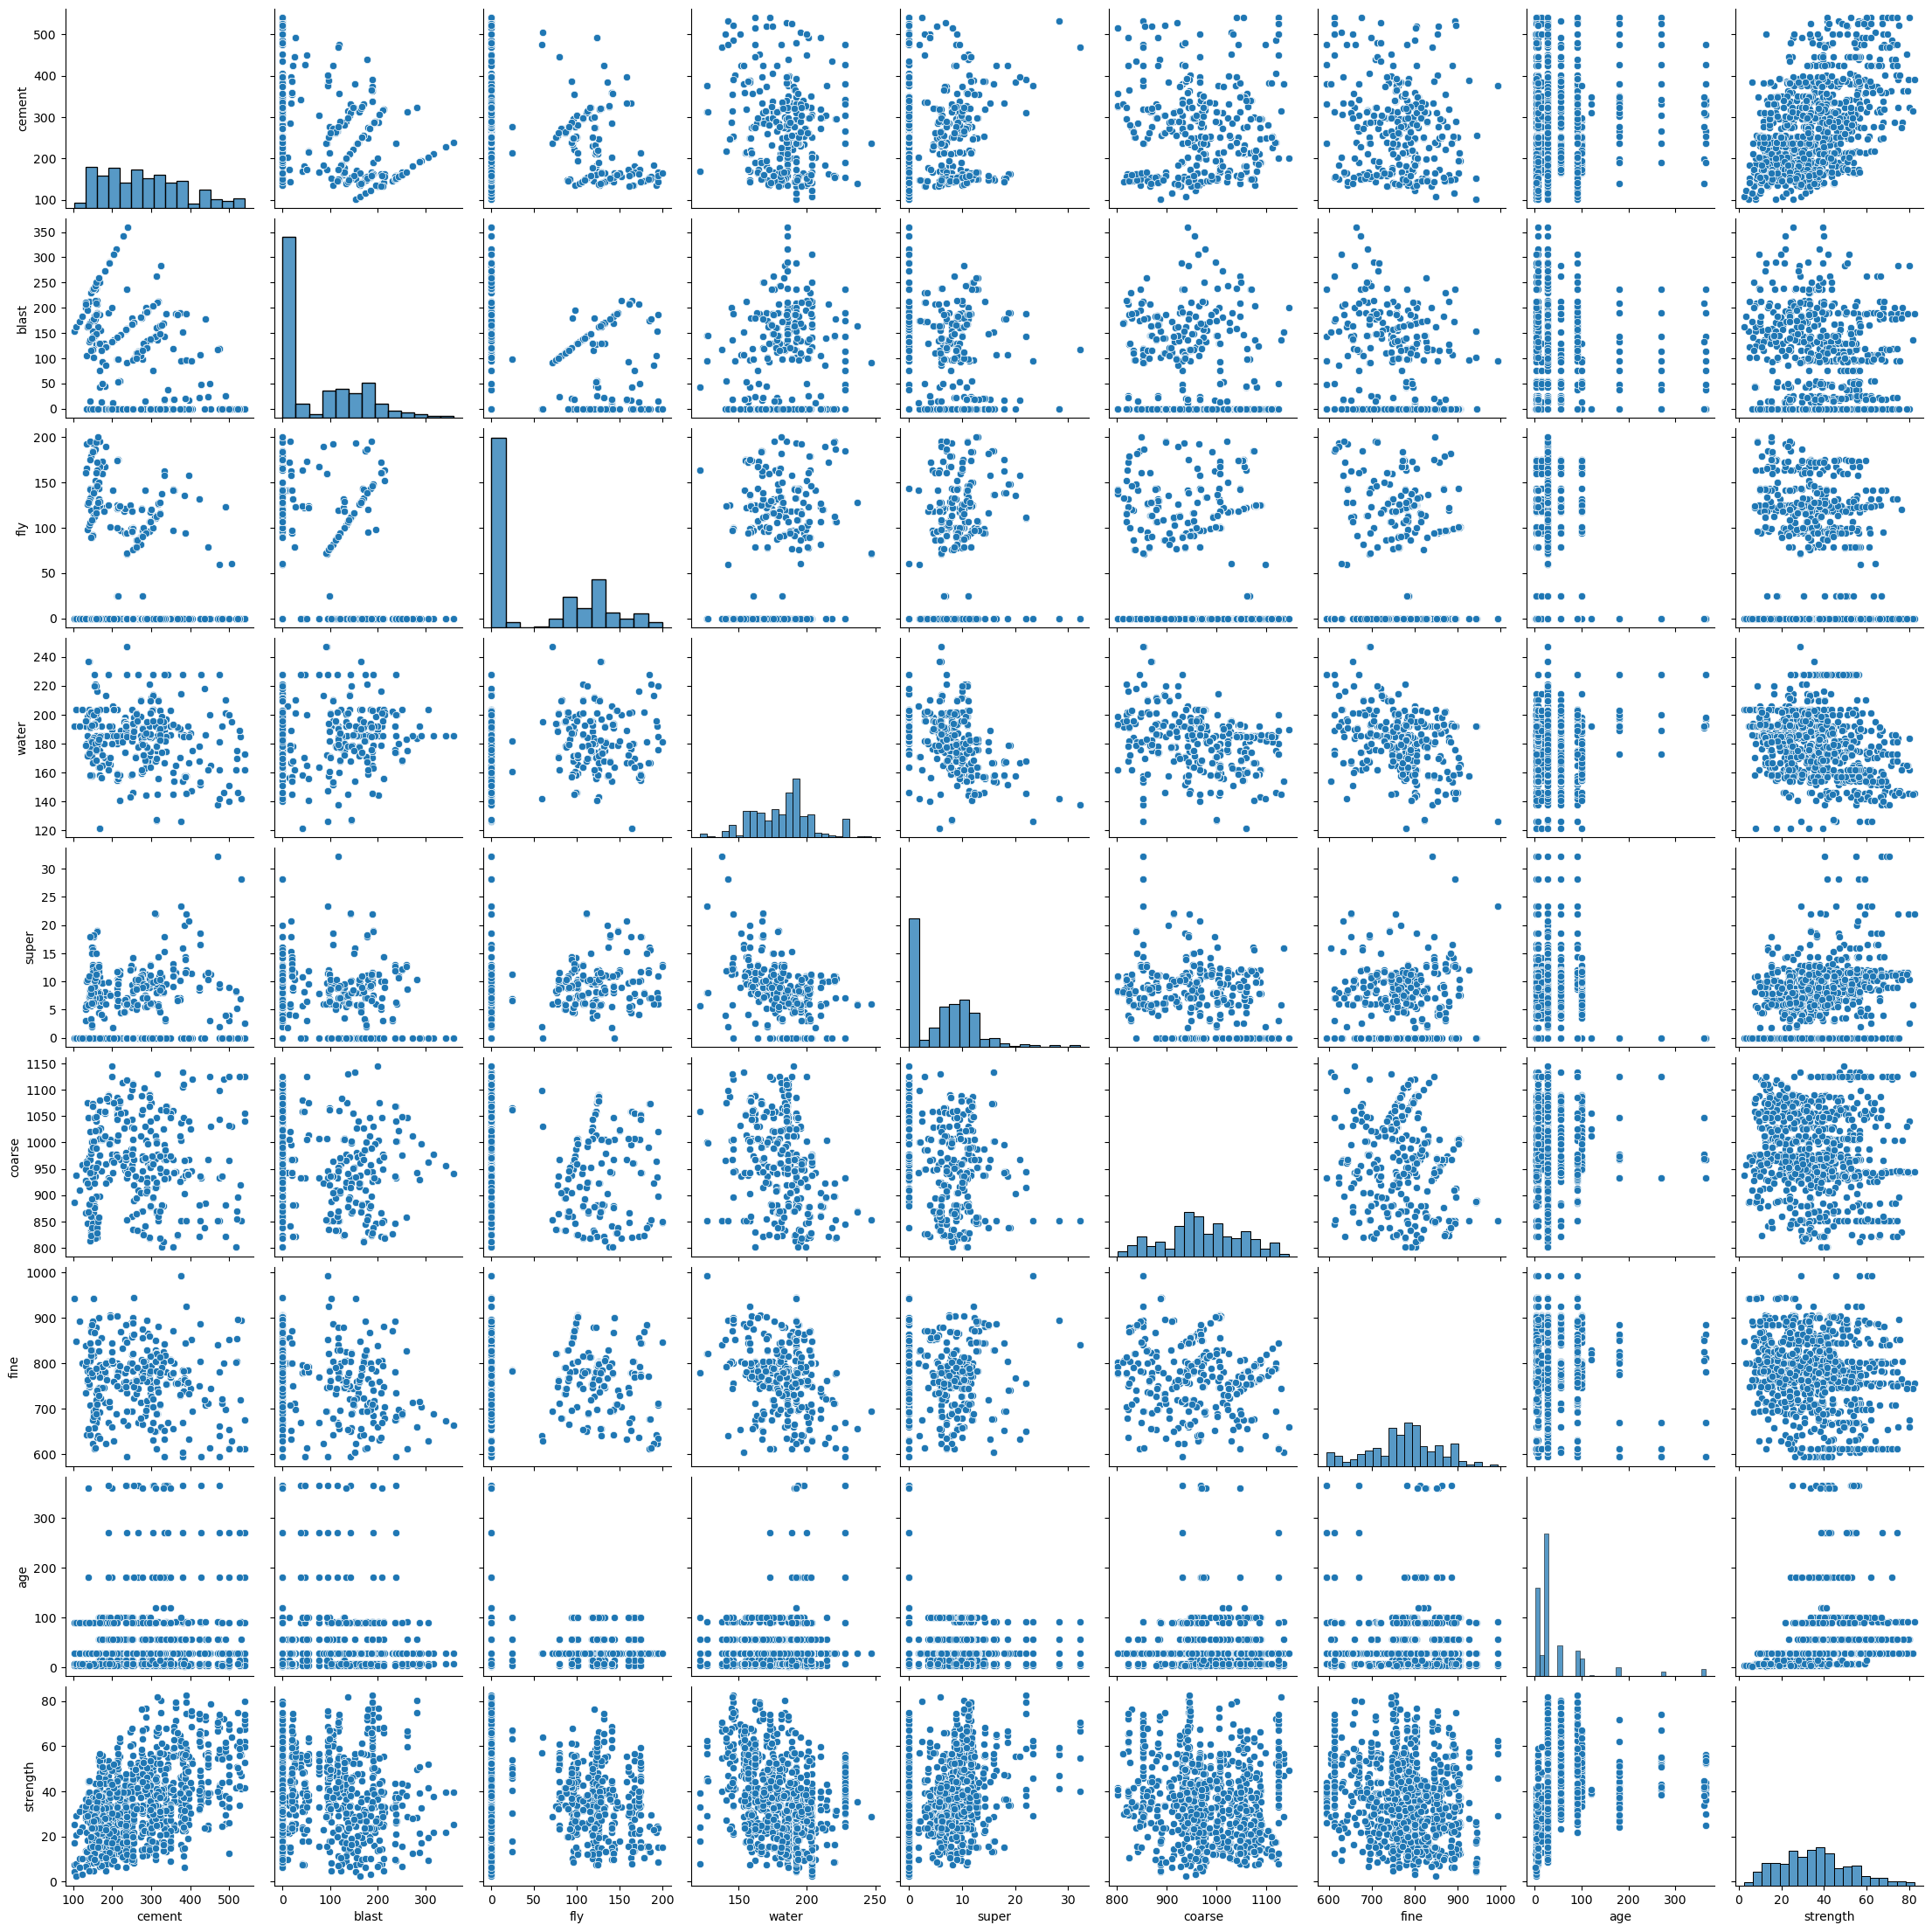

In [5]:
sns.pairplot(df)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

X_train.shape


(927, 8)

In [16]:

model = Sequential()
model.add(Dense(256, input_shape=(8,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse', optimizer='adam')
model.summary()

hist = model.fit(X_train, Y_train, epochs=100, validation_split=0.1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 256)               2304      
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 32)                4128      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 39,361
Trainable params: 39,361
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
27/27 [==============================] - 2s 13ms/step - loss: 1467.0012 - val_loss: 1476.2402
Epoch 2/100
27/27 [==============================] - 0s 5ms/step - loss: 782

27/27 [==============================] - 0s 4ms/step - loss: 37.6927 - val_loss: 55.1243
Epoch 72/100
27/27 [==============================] - 0s 4ms/step - loss: 36.0890 - val_loss: 52.9185
Epoch 73/100
27/27 [==============================] - 0s 5ms/step - loss: 35.3272 - val_loss: 48.0100
Epoch 74/100
27/27 [==============================] - 0s 5ms/step - loss: 36.4983 - val_loss: 49.2201
Epoch 75/100
27/27 [==============================] - 0s 5ms/step - loss: 35.1711 - val_loss: 50.0039
Epoch 76/100
27/27 [==============================] - 0s 4ms/step - loss: 34.6717 - val_loss: 51.3221
Epoch 77/100
27/27 [==============================] - 0s 4ms/step - loss: 35.2669 - val_loss: 45.5377
Epoch 78/100
27/27 [==============================] - 0s 4ms/step - loss: 33.4756 - val_loss: 48.7685
Epoch 79/100
27/27 [==============================] - 0s 4ms/step - loss: 34.1901 - val_loss: 46.0805
Epoch 80/100
27/27 [==============================] - 0s 4ms/step - loss: 34.9611 - val_loss: 4

Text(0.5, 1.0, 'loss')

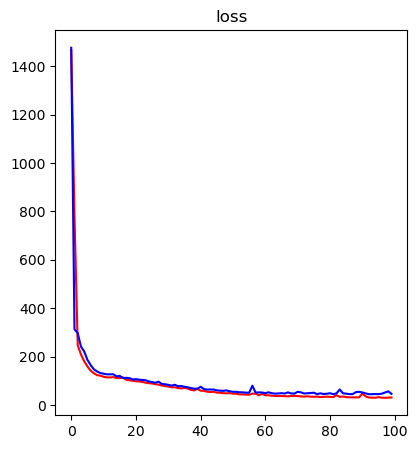

In [20]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], color='r')
plt.plot(hist.history['val_loss'], color='b')
plt.title('loss')

In [21]:

score = model.evaluate(X_test, Y_test)
print(score)

pred = model.predict(X_test[-5:])
print(pred)
print(Y_test[-5:])

4/4 [==============================] - 0s 6ms/step - loss: 38.5365
38.5365104675293
1/1 [==============================] - 0s 17ms/step
[[20.357271]
 [24.36789 ]
 [27.834084]
 [34.15944 ]
 [10.169613]]
803    19.105380
426    29.550941
892    32.239898
456    43.388725
800    13.713678
Name: strength, dtype: float64
